# Important
To Execute a cell. Press Shift+Enter or Ctrl+Enter

In [1]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Python Recap

## Printing

In [2]:
# here is how you print something
a = 1
b = 2
c = a + b
print(c)

#if you want to show line number View --> Toggle Line Number

3


## Conditional Statement

In [3]:
#conditional statement
x = 3
if x<5:
    print (x, 'is less than five')
else:
    print (x, 'is not less than five')

3 is less than five


## Define a function

In [4]:
#define a function
def f(x):
    a = 2*x + 1
    return a
print(f(10))

21


## While Loop

In [5]:
#while loop
i = 0
while i < 10:
    i+=1
    print(i, end='') #that's how you avoid new line

12345678910

## For Loop

In [6]:
#here is list and use it
a1 = [1,2,3,4,5,6]
for x in a1:
    print(x, end='')
print('----')
for i,x in enumerate(a1): #if you also want the index
    print(i, x)

123456----
0 1
1 2
2 3
3 4
4 5
5 6


In [7]:
#here is how to build one (not so beautiful)
#Also notice here that I use a1 from the previous cell.
#once you execute the code it's stored in the kernel
a2 = []
for x in a1:
    a2.append(2*x)
print (a2)

[2, 4, 6, 8, 10, 12]


## For Comprehension
We will be using it a lot in this class

In [8]:
#But this is ugly
#let us use list comprehension makes it much easier to read
a3 = [2*x+1 for x in a1]
print (a3)

[3, 5, 7, 9, 11, 13]


## Numpy array and broadcast operation

In [9]:
#but since we will be using it a lot we have something much better
#it's called numpy array

arr = np.linspace(0,1,10) #this gives you 10 number from 0 to 10 equally spaced 
print (arr)
print (2*arr) #array broadcasting magic it does what you think it should
print (arr**2)
print (np.exp(arr)) #exp function

#you can also convert normal list to numpy array if you want
arr3 = np.array(a3)
print(arr3*2)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
[0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ]
[1.         1.11751907 1.24884887 1.39561243 1.5596235  1.742909
 1.94773404 2.17662993 2.43242545 2.71828183]
[ 6 10 14 18 22 26]


## Plotting

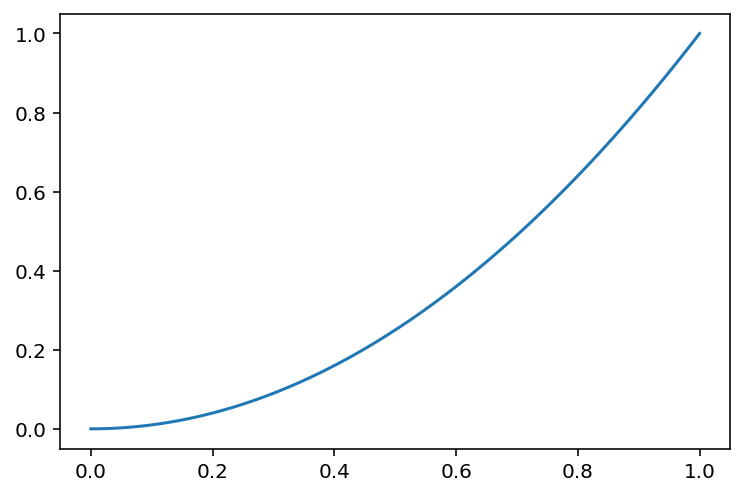

In [10]:
#plotting is easy
xs = np.linspace(0,1,100)
ys = xs**2
plt.plot(xs,ys)
plt.savefig('first_plot.pdf') #you can save it too

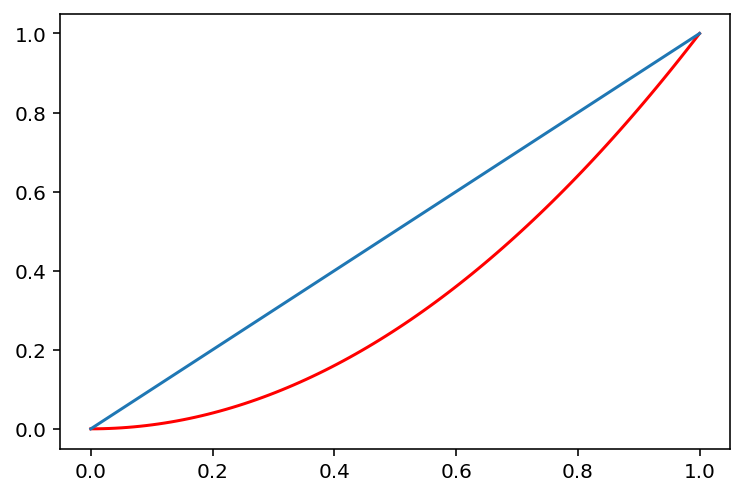

In [11]:
plt.plot(xs,ys, color='red') #change the style too
plt.plot(xs,xs) #and you can plot two things on the same graph
#It can do much more see: http://matplotlib.org/gallery.html

# Root Finding

## Consider $x = cos(x)$. Our goal is to solve for x that satisfy that.

Plot something that helps you solve it.

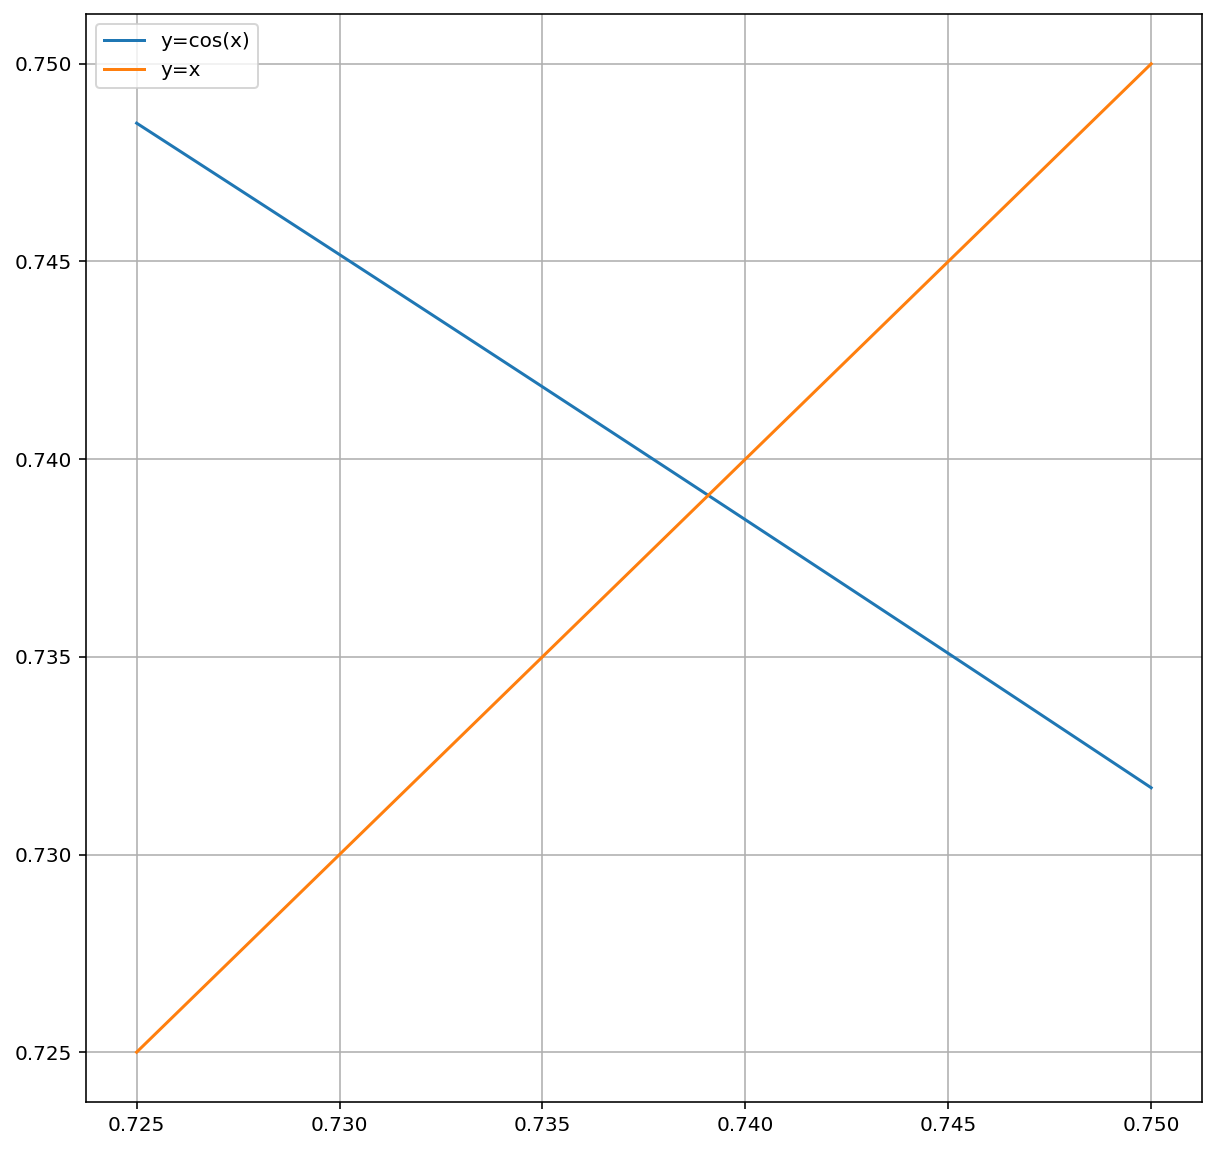

In [18]:
xmin = 0.725
xmax = 0.750
xs = np.linspace(xmin, xmax,100)
cosxs = np.cos(xs)
plt.figure(figsize=(10,10))
plt.plot(xs, cosxs, label='y=cos(x)')
plt.plot(xs, xs, label='y=x')
plt.legend()
# plt.xlim(0.6,0.8)
plt.grid()

In [22]:
imin = np.argmin(np.abs(np.cos(xs) - x))
xs[imin]

0.725

## Given the what you did what is your answer?

## How accurate is your answer?
$answer = \ldots \pm \ldots$

Accuracy is also an important part for numerical algorithm --> How fast we can improve our accuracy.

## Make it more accurate

## Write the equation above as $f(x)= 0$

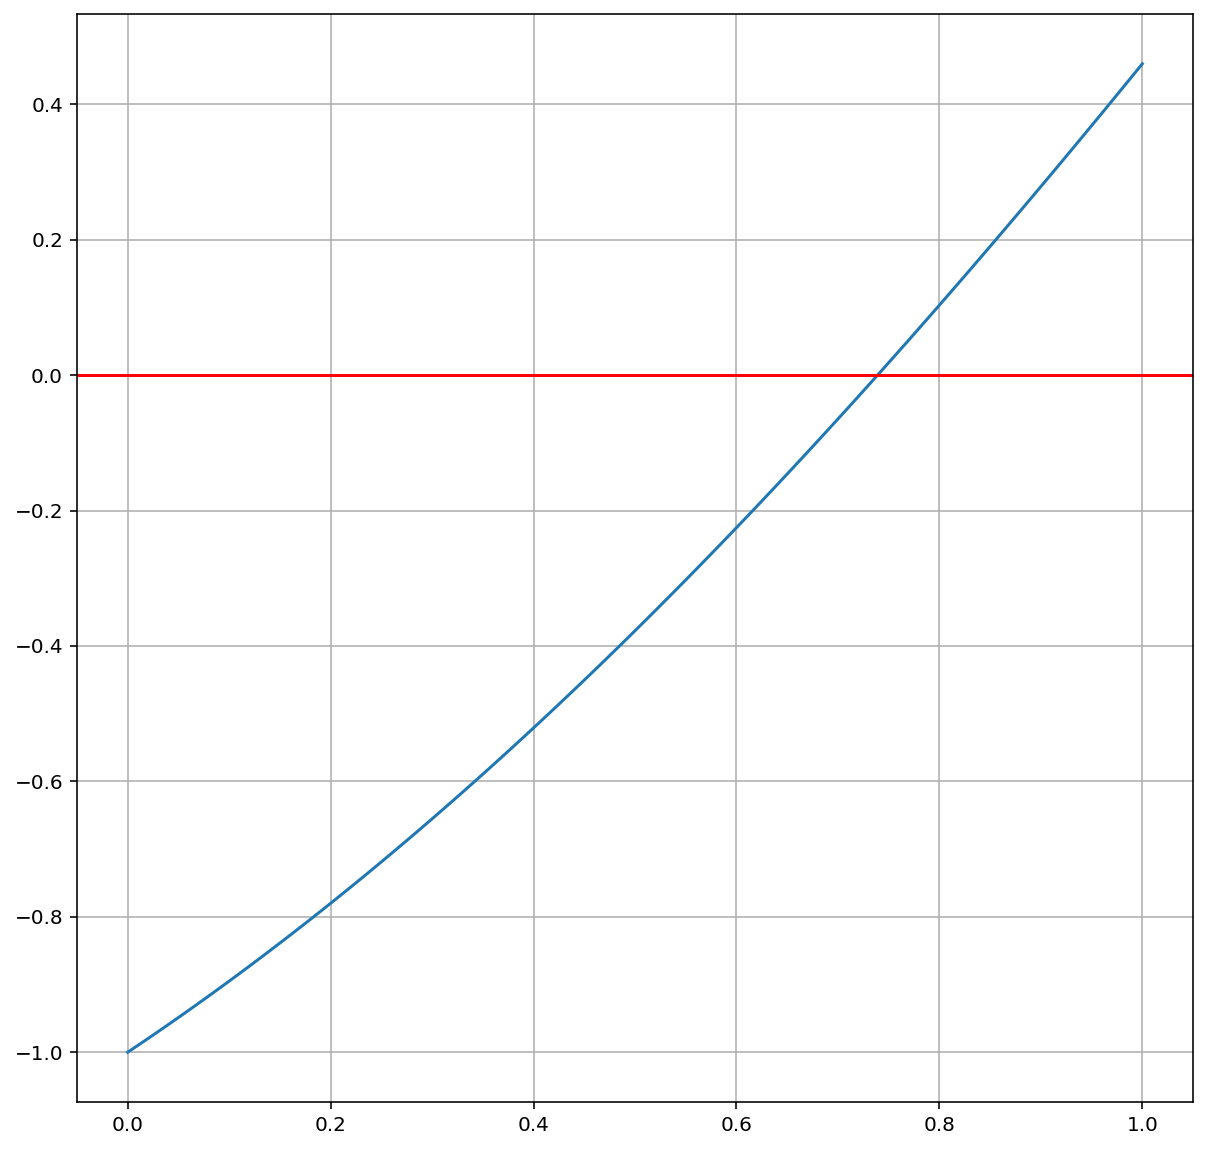

In [26]:
xmin = 0
xmax = 1
xs = np.linspace(xmin, xmax,100)
cosxs = np.cos(xs)
plt.figure(figsize=(10,10))
plt.plot(xs, xs-cosxs, label='y=cos(x)')
plt.axhline(0, color='red')
# plt.xlim(0.6,0.8)
plt.grid()

# Bisection

## If you use a bisection method and your starting bound is $x=0.2$ and $x=1.2$, how do you know that there is a solution by looking only at $f(0.2)$ and $f(1.2)$

In [28]:
from math import cos
def f(x):
    return x - cos(x)

# guess = mid point
guess = (0.2 + 1.2)/2

# we know there is a solution since
f(0.2)*f(1.2) < 0

True

## Plot the graph along with the two vertical line representing the bound. (use plt.axvline)

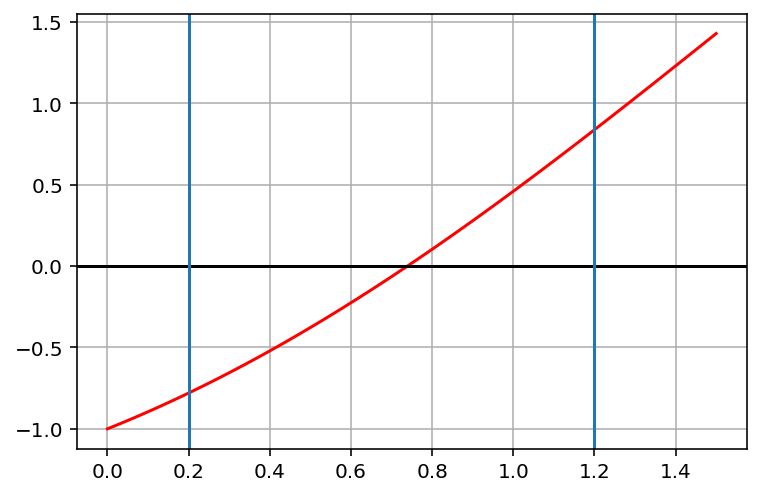

In [32]:
xs = np.linspace(0,1.5,100)
ys = [f(x) for x in xs]
plt.plot(xs, ys, color='red')
plt.axhline(0, color='black')
plt.axvline(1.2)
plt.axvline(0.2)
plt.grid()

## If we guess right in the middle of the two bound what would be the error on our guess?
$$
    answer = \ldots \pm \ldots
$$


In [33]:
(1.2-0.2)/2

0.5

## If you want to make a new pair of bound which pair would you pick? How did you know?

In [38]:
left = 0.2
right = 1.2
mid = (1.2 + 0.2)/2
print('mid', f(mid))
print('left', f(left))
print('right', f(right))

# pick mid and right since
f(mid) * f(right) < 0

mid -0.06484218728448854
left -0.7800665778412417
right 0.8376422455233263


True

## Write a function which find solution to f(x)=0 using the method you just discovered. Try plotting as you go.

In [39]:
from typing import Callable
def bisection(f: Callable[[float], float], l: float, r: float, n=10):
    assert f(l)*f(r) < 0
    mid = (l+r)/2
    for i in range(n):
        mid = (l+r)/2
        if f(mid)*f(l)<0: # if the mid and left has opposite -> pick left
            r = mid
        else:
            l = mid
    return mid

bisection(f, 0.2, 1.2, 10)

# to check if a and b has oppositie sign
# if a*b < 0:
#    ...

0.7400390625

## Given that the intial bound is of size $S$. After $n$ iterations how accurate is your answer?

$$\text{error}(n) = \ldots$$

In [ ]:
1/2^n

## Give me the solution to  $x=cos(x)$ that is at most  $10^{−6}$ away from the real answer. Verify your solution graphically.

$1/2^n < 10^{-6}$

take log

$-n < -6 \times \log_2 10$

$ n > 6 \times \log_2 10$

$ n > 20$

In [40]:
bisection(f, 0.2, 1.2, 20)

0.7390844345092773

# Newton's Method
Let us do someting a bit more efficient. Suppose that we want to solve  $x^3−x=1$  using Newtons's method with initial guess at  $x=2$ . If you start to get lost, PLOT!.

## What is the function that we are trying to find intercept? Plot it.

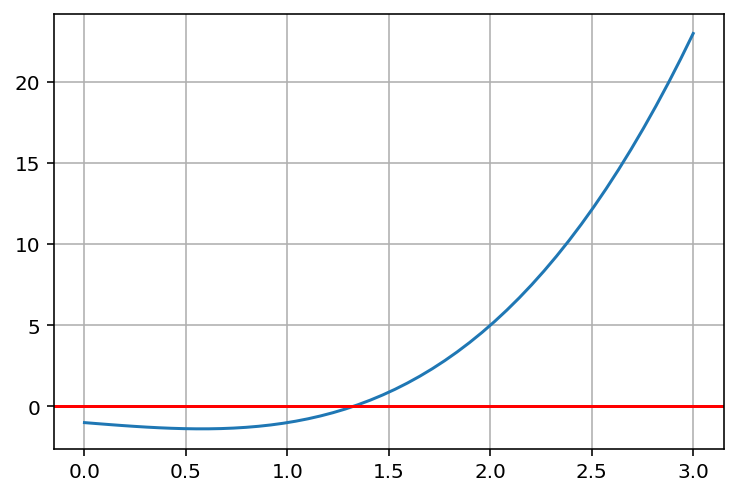

In [45]:
def f(x):
    return x**3 - x - 1

def fp(x):
    return 3*x**2 - 1

xs = np.linspace(0,3)
ys = [f(x) for x in xs]

plt.plot(xs, ys)
plt.axhline(0, color='red')
plt.grid()

## What is the slope of the tangent line at $x=2$

In [49]:
fp(2)

11

## What is the equation for the tangent line at  $x=2$ Plot it along with the function.

y = 11 x - 17

## What is the intercept for that line? That's your new guess.

-c/m = 17/11

## Now combine everything in to one formula you should get something along the line of

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

This is called update rule; how you get an improved answer from the previous guess.

## Newton's method converges very very quickly. We will go through the derivation later on.
Now find solution to $x^3−x=1$. Also as a plotting exercise try make something similar to this figure:

Here is how I annotate the figure
`plt.annotate('x%d'%i, xy=(x, 0), xytext=(x,-0.2), fontsize=18)`

<div>
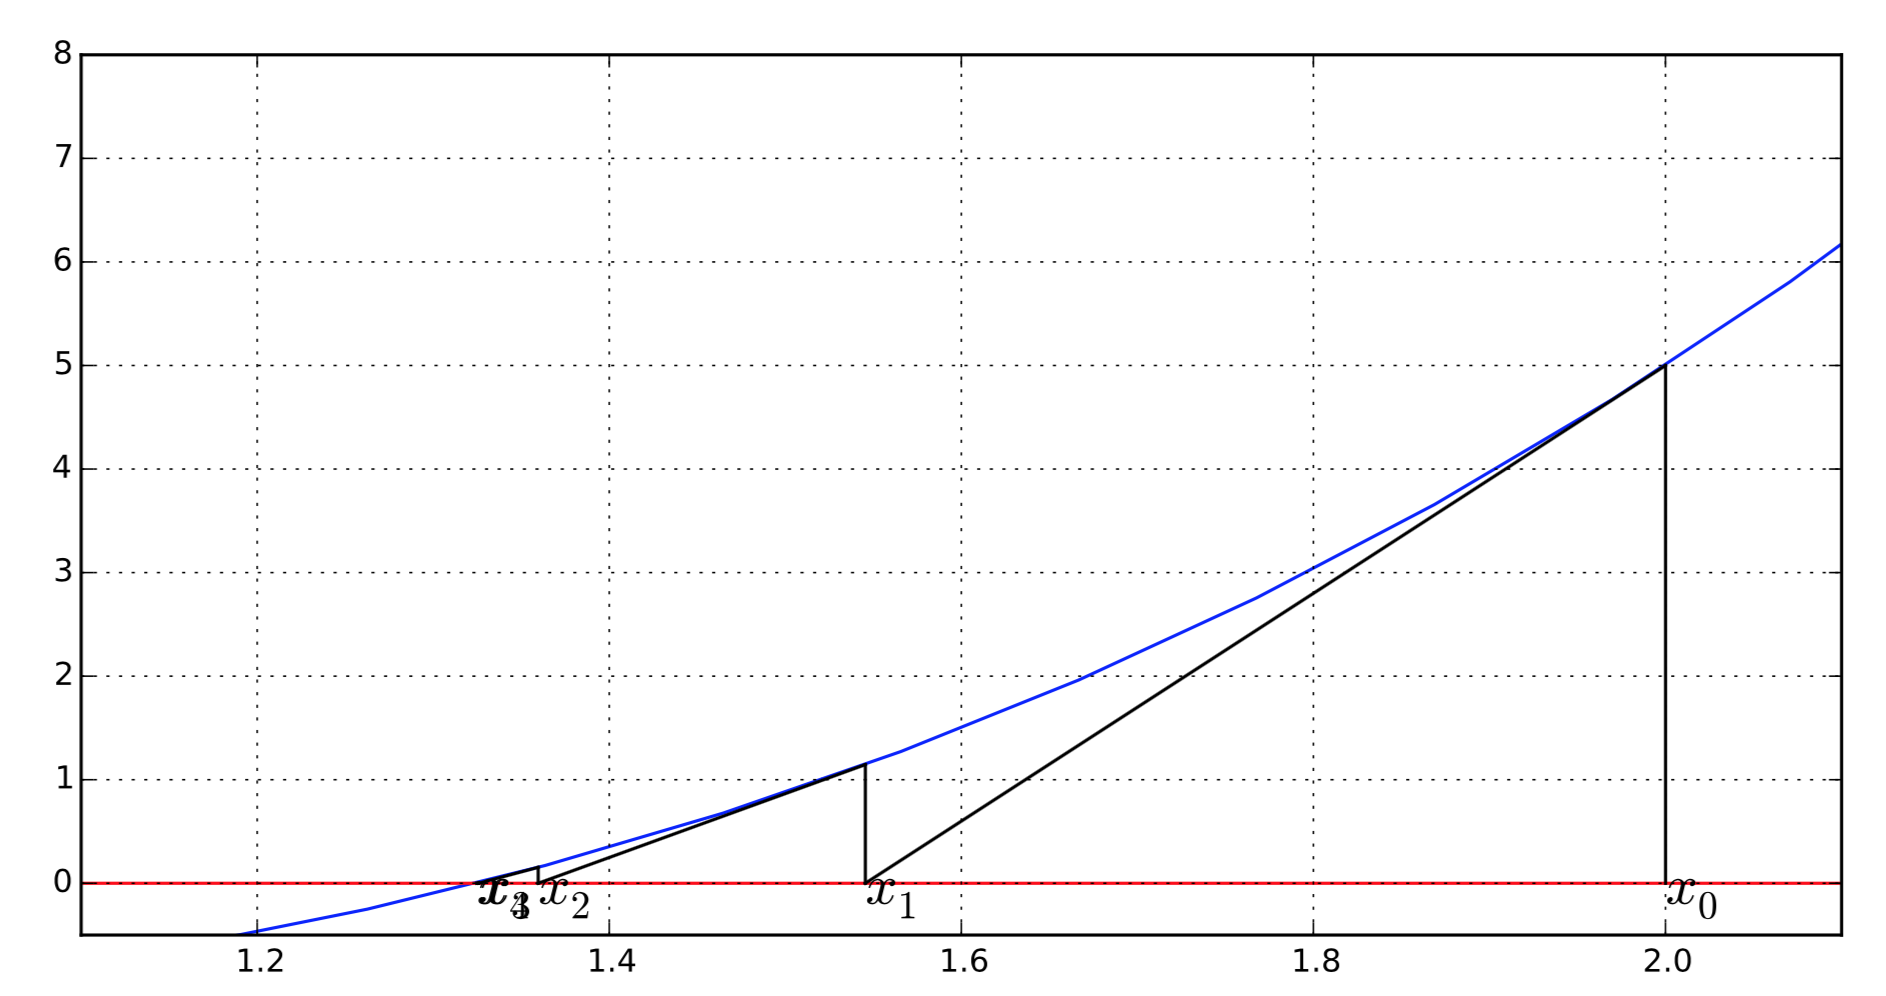
</div>


In [52]:
def newton(f, fp, x0, n):
    guess = x0
    for i in range(n):
        guess = guess - f(guess)/fp(guess)
    return guess

newton(f, fp, 2, 3)

1.325801345005845

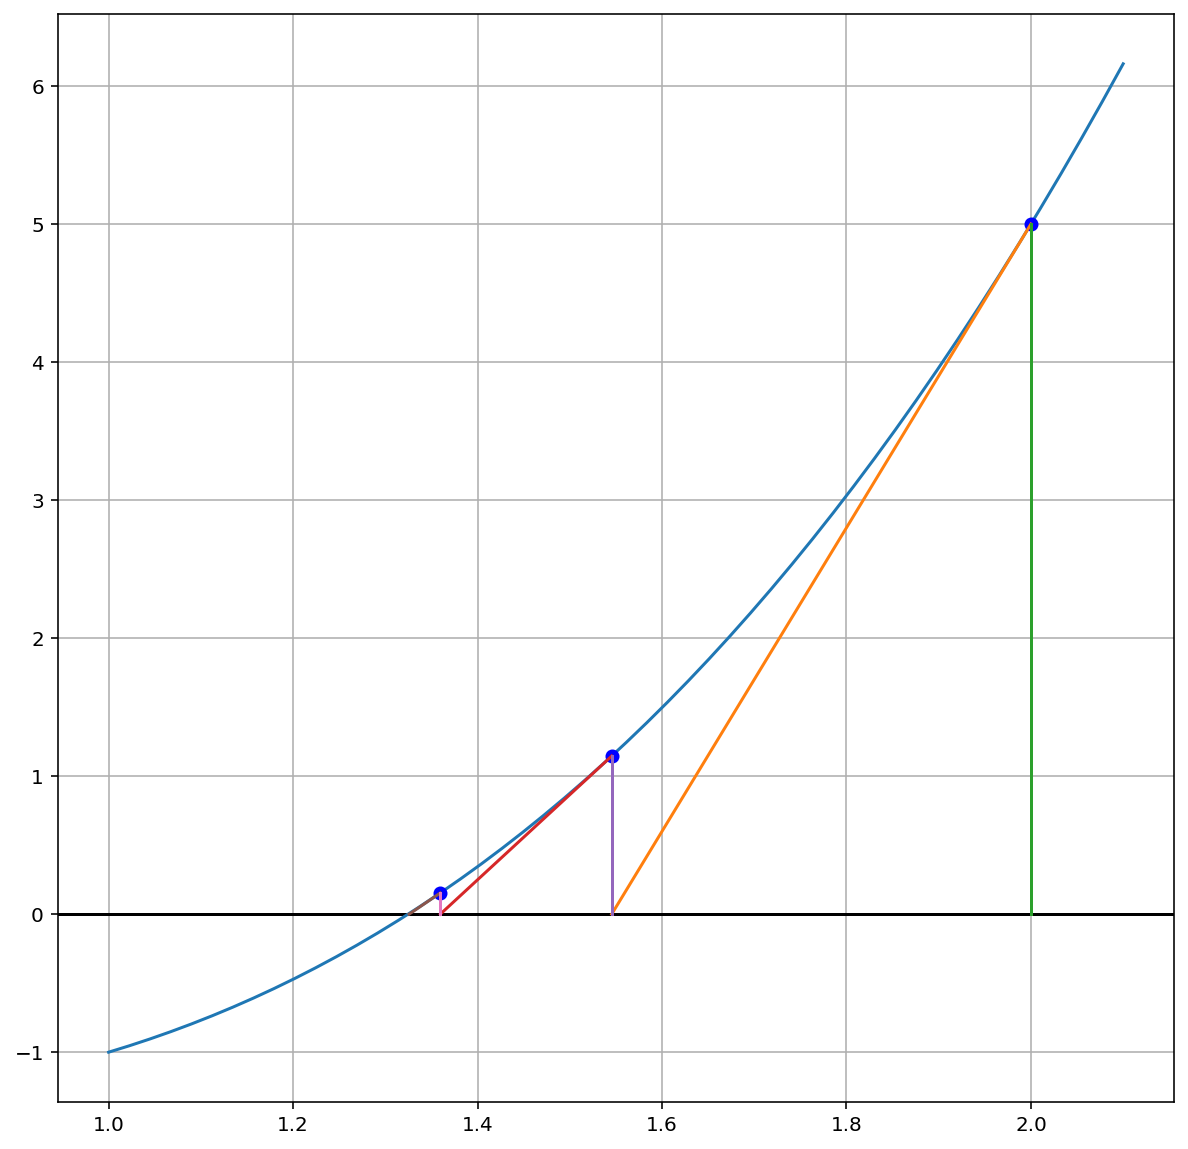

In [67]:
from dataclasses import dataclass
from typing import List

@dataclass
class GMC:
    old_guess: float
    old_y: float
    new_guess: float
    m: float
    c: float
def newton_list(f, fp, x0, n) -> List[GMC]:
    guess = x0
    gmcs = []
    for i in range(n):
        og = guess
        guess = guess - f(guess)/fp(guess)
        gmcs.append(GMC(old_guess=og, old_y= f(og), new_guess=guess, m=fp(og), c=f(og)-fp(og)*og))
    return gmcs
def plot_gmc(gmc: GMC):
    plt.plot(gmc.old_guess, gmc.old_y, 'ob')
    xs = np.linspace(gmc.old_guess, gmc.new_guess, 100)
    ys = gmc.m*xs + gmc.c
    plt.plot(xs, ys)
    plt.plot([gmc.old_guess, gmc.old_guess],[0, gmc.old_y])


gmcs = newton_list(f, fp, 2, 3)

plt.figure(figsize=(10, 10))
xs = np.linspace(1,2.1)
ys = [f(x) for x in xs]
plt.axhline(0, color='k')
plt.plot(xs, ys)
plt.grid()
for gmc in gmcs:
    plot_gmc(gmc)

## Solve $\sqrt[3]{x}=0$ by hand. What's $x$?

In [87]:
def f(x):
    return pow(x, 1/3.)
def fp(x):
    return 1/3*pow(x, -2/3.)


def newton(f, fp, x0, n):
    guess = x0
    for i in range(n):
        guess = guess - f(guess)/fp(guess)
        print(guess)
    return guess

newton(f, fp, 1, 5)

-2.0
(4-2.2893847434456487e-15j)
(-7.999999999999998+4.5787694868912965e-15j)
(15.999999999999991-2.195811558520189e-14j)
(-31.99999999999998+4.391623117040377e-14j)


(-31.99999999999998+4.391623117040377e-14j)

## Try Newton's method on it.
Try plotting as you go to see what's going on.

Now you learn that even though it converges super fast. It doesn't guarantee to converge.

# Bonus


## Simplify (1+x)-1

## Then why is this false

In [3]:
x = 1e-10
print (x)
print ((1+x)-1 == x)

1e-10
False
